In [1]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('Telco-Customer-Churn.csv')

In [2]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Dapat diketahui dari hasil diatas terdapat 7043 row data dengan rincian bahwa rata-rata tenure adalah 32.37 month, sedangkan untuk MonthlyCharges rata-ratanya sebesar 64.76.

percentil 25% adalah 9, mengindikasikan bahwa jika terdapat nilai dibawah nilai persentile 25% maka akan terdeteksi sebagai outlier
percentil 75% adalah 55, hal tersebut mengindikasikan bahwa apabila terdapat tenure yang memiliki nilai diatas 55 akan terdeteksi sebagai outlier

std. deviasi pada kolom tenure adalah sebesar 24,5 mengartikan bahwa ukuran sebaran datanya memiliki kecenderungan diatas nilai mean dengan maksimal 24,5 dan dibawah nilai mean minimal 24,5.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Check missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Check duplicated data
df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

<AxesSubplot:ylabel='None'>

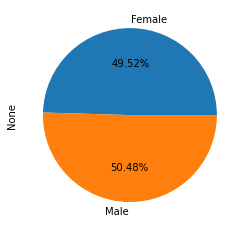

In [7]:
df.groupby('gender').size().plot(kind='pie', autopct='%.2f%%')

c:\Users\aarsy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

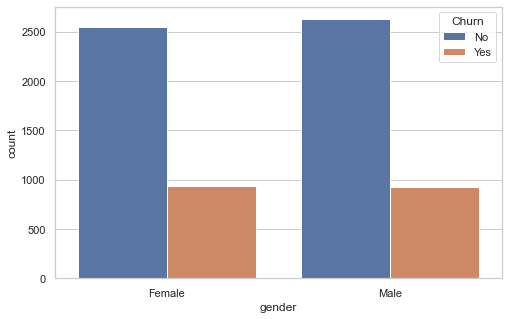

In [8]:
plt.figure(figsize = (8,5))
sns.set(style = 'whitegrid')
sns.countplot(df.gender, hue = df.Churn)

<AxesSubplot:ylabel='None'>

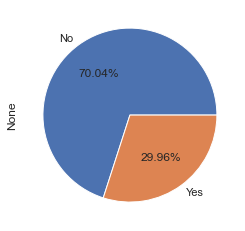

In [9]:
df.groupby('Dependents').size().plot(kind='pie', autopct='%.2f%%')

<AxesSubplot:ylabel='None'>

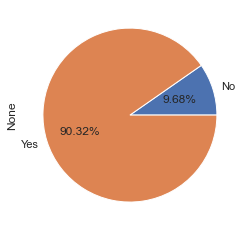

In [10]:
df.groupby('PhoneService').size().plot(kind='pie', autopct='%.2f%%')

Text(0.5, 1.0, 'Customers by Contract Type')

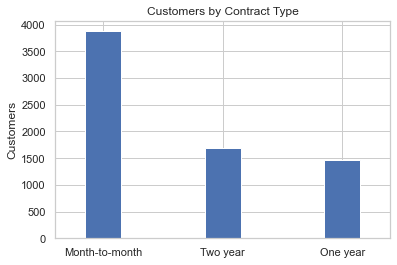

In [11]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Customers')
ax.set_title('Customers by Contract Type')

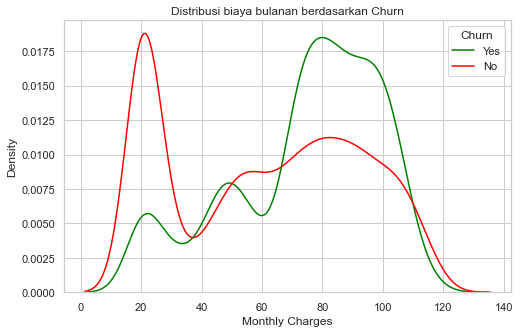

In [12]:
#Untuk mengetahui apakah pelanggan yang memiliki biaya bulanan lebih tinggi akan cenderung churn atau tidak
churn_yes=df[df['Churn']=='Yes']
churn_no=df[df['Churn']=='No']


fig, ax = plt.subplots(1,1, figsize=(8,5))
sns.kdeplot(churn_yes['MonthlyCharges'] ,color='green', ax=ax, label='Yes')
sns.kdeplot(churn_no['MonthlyCharges'] ,color='red', ax=ax, label='No')
plt.legend(title='Churn')
plt.title('Distribusi biaya bulanan berdasarkan Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density');

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

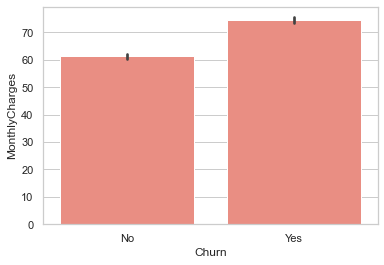

In [13]:
#Untuk mengetahui apakah pelanggan yang memiliki biaya bulanan lebih tinggi akan cenderung churn atau tidak
# churn_yes=df[df['Churn']=='Yes']
# churn_no=df[df['Churn']=='No']


# fig, ax = plt.subplots(1,1, figsize=(8,5))
# plt.bar(churn_yes['MonthlyCharges'] ,color='green', label='Yes', height=4)
# plt.bar(churn_no['MonthlyCharges'] ,color='red', label='No', height=4)
# plt.legend(title='Churn')
# plt.title('Distribusi biaya bulanan berdasarkan Churn')
# plt.xlabel('Monthly Charges')
# plt.ylabel('Density');

sns.barplot(x="Churn", y="MonthlyCharges", data=df,
                 color="salmon")

INTERPRETASI

-- diberikan penjelasan

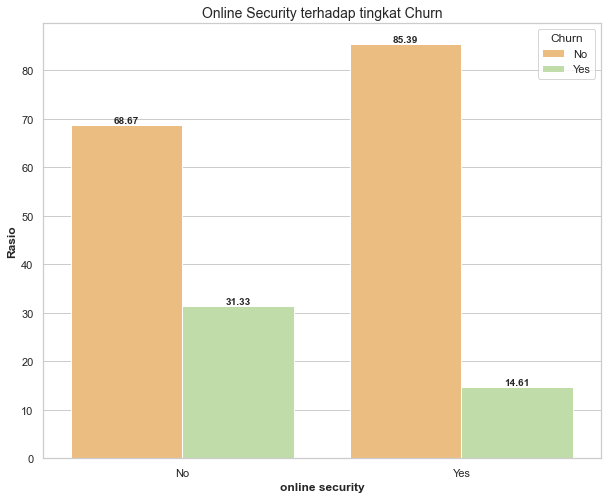

In [14]:
#Variabel online security apakah mempengaruhi churn atau tidaknya customer
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service', 'No')
online_sec=df.groupby(['OnlineSecurity','Churn']).agg({'customerID':'nunique'}).reset_index()
group_os=df.groupby('OnlineSecurity').agg({'customerID':'nunique'}).reset_index()
merge_on_group=online_sec.merge(group_os, on='OnlineSecurity')
merge_on_group['ratio']=merge_on_group['customerID_x']/merge_on_group['customerID_y']*100
merge_on_group['ratio']=round(merge_on_group['ratio'],2)


plt.figure(figsize=(10,8))
ax=sns.barplot(x='OnlineSecurity', y='ratio', hue='Churn', data=merge_on_group, palette='Spectral')
for j in ax.containers:
    ax.bar_label(j, fontsize=10, fontweight='bold')
plt.title('Online Security terhadap tingkat Churn',fontsize=14)
plt.xlabel('online security',fontweight='bold')
plt.ylabel('Rasio', fontweight='bold');

Dari grafik diatas terdapat beberapa informasi yang yaitu:
- Adanya fitur online security diduga mempengaruhi keputusan customer untuk churn. Hal ini sejalan dengan visualisasi yang ada bahwa apabila customer tidak memiliki fitur online security maka ia cenderung churn, apabila customer memiliki fitur online security maka ia cenderung tidak churn.
- Sedangkan customer yang memiliki kategori Online Security "No" memiliki tingkat churn yang paling besar yaitu sebesar 41,77%.

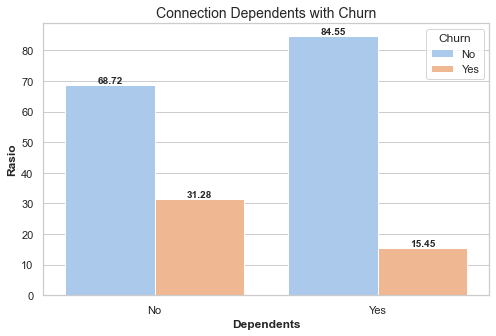

In [15]:
#Variabel Dependents apakah mempengaruhi churn atau tidaknya customer
online_sec=df.groupby(['Dependents','Churn']).agg({'customerID':'nunique'}).reset_index()
group_os=df.groupby('Dependents').agg({'customerID':'nunique'}).reset_index()
merge_on_group=online_sec.merge(group_os, on='Dependents')
merge_on_group['ratio']=merge_on_group['customerID_x']/merge_on_group['customerID_y']*100
merge_on_group['ratio']=round(merge_on_group['ratio'],2)


plt.figure(figsize=(8,5))
ax=sns.barplot(x='Dependents', y='ratio', hue='Churn', data=merge_on_group, palette='pastel')
for j in ax.containers:
    ax.bar_label(j, fontsize=10, fontweight='bold')
plt.title('Connection Dependents with Churn',fontsize=14)
plt.xlabel('Dependents',fontweight='bold')
plt.ylabel('Rasio', fontweight='bold');

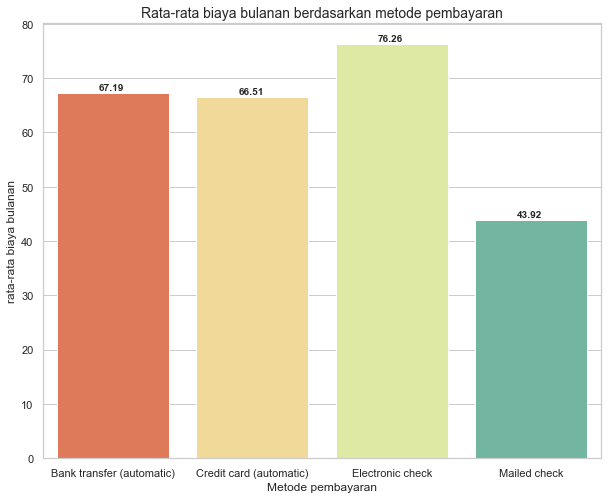

In [16]:
grop=df.groupby('PaymentMethod').agg({'MonthlyCharges':'mean'}).reset_index()
grop['MonthlyCharges']=round(grop['MonthlyCharges'],2)

plt.figure(figsize=(10,8))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', data=grop, palette='Spectral')
for i in range(len(grop)):
    plt.text(x=-0.1+i, y=grop['MonthlyCharges'].iloc[i]+0.5, s=str(grop['MonthlyCharges'][i]), fontsize=10, fontweight='bold')
plt.title('Rata-rata biaya bulanan berdasarkan metode pembayaran',fontsize=14)
plt.xlabel('Metode pembayaran')
plt.ylabel('rata-rata biaya bulanan');

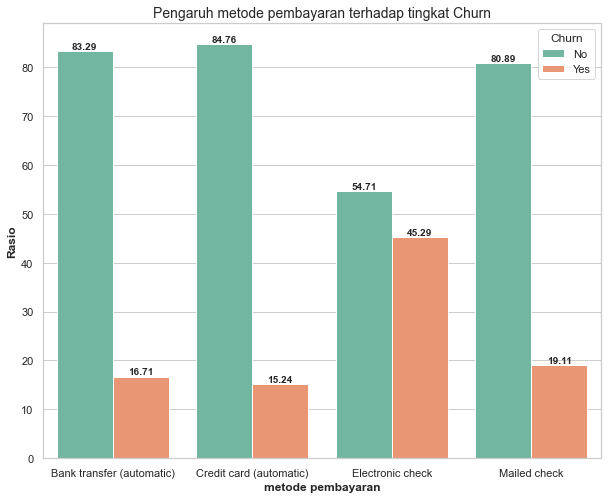

In [17]:
#Variabel PaymentMethod apakah mempengaruhi churn atau tidaknya customer
online_sec=df.groupby(['PaymentMethod','Churn']).agg({'customerID':'nunique'}).reset_index()
group_os=df.groupby('PaymentMethod').agg({'customerID':'nunique'}).reset_index()
merge_on_group=online_sec.merge(group_os, on='PaymentMethod')
merge_on_group['ratio']=merge_on_group['customerID_x']/merge_on_group['customerID_y']*100
merge_on_group['ratio']=round(merge_on_group['ratio'],2)


plt.figure(figsize=(10,8))
ax=sns.barplot(x='PaymentMethod', y='ratio', hue='Churn', data=merge_on_group, palette='Set2')
for j in ax.containers:
    ax.bar_label(j, fontsize=10, fontweight='bold')
plt.title('Pengaruh metode pembayaran terhadap tingkat Churn',fontsize=14)
plt.xlabel('metode pembayaran',fontweight='bold')
plt.ylabel('Rasio', fontweight='bold');

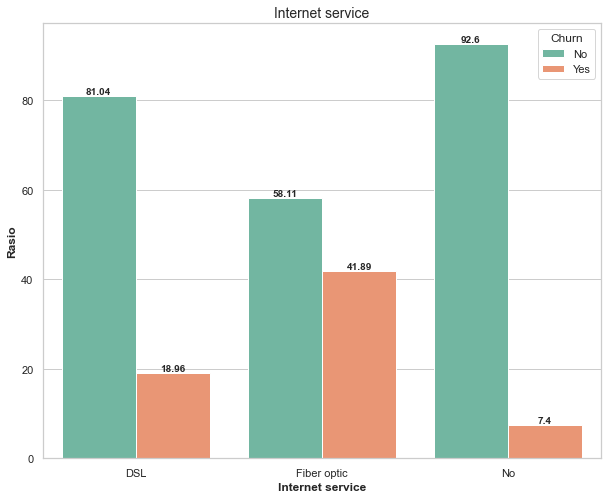

In [18]:
#Variabel InternetService apakah mempengaruhi churn atau tidaknya customer
online_sec=df.groupby(['InternetService','Churn']).agg({'customerID':'nunique'}).reset_index()
group_os=df.groupby('InternetService').agg({'customerID':'nunique'}).reset_index()
merge_on_group=online_sec.merge(group_os, on='InternetService')
merge_on_group['ratio']=merge_on_group['customerID_x']/merge_on_group['customerID_y']*100
merge_on_group['ratio']=round(merge_on_group['ratio'],2)


plt.figure(figsize=(10,8))
ax=sns.barplot(x='InternetService', y='ratio', hue='Churn', data=merge_on_group, palette='Set2')
for j in ax.containers:
    ax.bar_label(j, fontsize=10, fontweight='bold')
plt.title('Internet service',fontsize=14)
plt.xlabel('Internet service',fontweight='bold')
plt.ylabel('Rasio', fontweight='bold');

In [19]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


--------------------------------------------------------------------------------------------------

data diatas imbalance karena terjadi ketimpangan antara user yang churn dan tidak churn, jika ingin melakukan klasifikasi terdapat beberapa solusi penangannya:
1. Data dibuat balance terlebih dahulu, yakni berimbang antara yang satu dengan yang lainnya dengan cara menghapus data yang berjumlah banyak dengan random atau diduplicated data yang sedikit dengan random.
2. Menggunakan Confusion Matrix

# DATA PREPROCESSING

In [20]:
# Melakukan kerangka data baru
data1= pd.DataFrame(columns=df.columns.unique())
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [21]:
# Melakukan encoding untuk beberapa data yang bersifat object
encod=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
noencod=['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [22]:
#Looping untuk encoding
for i in encod:
    kond= [(df[i]=='Male'),(df[i]=='Female'),(df[i]=='Yes'),
        (df[i]=='No'),(df[i]=='No internet service'),(df[i]==''),(df[i]=='Month-to-month'),
        (df[i]=='Two year'),(df[i]=='Electronic check'),(df[i]=='Mailed check')]
    beta=[1,0,1,0,2,4,0,1,0,1]
    data1[i]=np.select(kond, beta, default=3)
for j in noencod:
    data1[j]=df[j]
display(data1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,3,3,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,3,1,...,1,0,0,0,3,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,3,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,3,3,1,...,1,1,0,0,3,0,3,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,3,0,...,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,3,1,...,1,1,1,1,3,1,1,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,3,0,...,1,0,1,1,3,1,3,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,3,3,1,...,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,3,0,...,0,0,0,0,0,1,1,74.40,306.6,1


In [23]:
data1.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.712338,2.349993,0.286668,0.778220,0.777226,0.723555,0.817691,0.821241,0.868096,0.592219,1.534857,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.886581,1.236013,0.452237,0.778472,0.778826,0.795896,0.763212,0.761725,1.170283,0.491457,1.338387,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,3.000000,118.750000,1.000000


In [24]:
data1.sort_values(by=['TotalCharges'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,0,0,1,1,0,1,0,3,1,...,1,0,1,1,1,0,1,80.85,,0
3826,3213-VVOLG,1,0,1,1,0,1,1,0,0,...,2,2,2,2,1,0,1,25.35,,0
4380,2520-SGTTA,0,0,1,1,0,1,0,0,0,...,2,2,2,2,1,0,1,20.00,,0
753,3115-CZMZD,1,0,0,1,0,1,0,0,0,...,2,2,2,2,1,0,1,20.25,,0
5218,2923-ARZLG,1,0,1,1,0,1,0,0,0,...,2,2,2,2,3,1,1,19.70,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646,8249-THVEC,1,0,1,1,51,1,0,0,0,...,2,2,2,2,3,0,1,19.40,997.75,0
5598,6051-PTVNS,0,0,1,1,55,1,0,0,0,...,2,2,2,2,3,0,3,19.15,998.1,0
3686,5899-MQZZL,0,0,0,0,13,1,1,3,0,...,0,0,0,0,0,1,1,75.00,999.45,1
3353,4536-PLEQY,1,0,1,0,12,1,0,3,0,...,0,0,0,1,0,1,3,85.05,999.8,0


In [25]:
# Setelah dicek masih terdapat data non-clean yakni berupa data kosong bukan NaN, sehingga perlu dilakukan drop terhadap kondisi tersebut
data1['TotalCharges'].replace(' ', np.nan, inplace=True)
data1.dropna(subset=['TotalCharges'], inplace=True)

<AxesSubplot:>

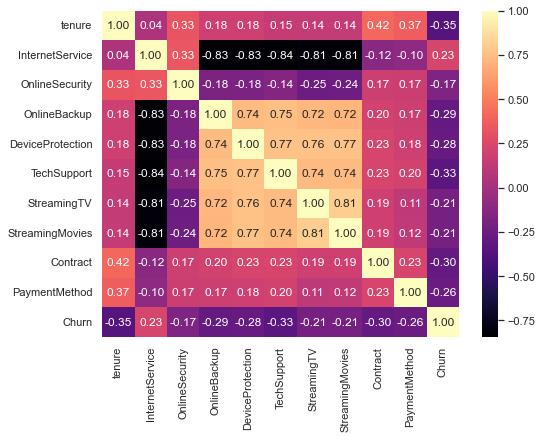

In [26]:
data2=data1[['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod','Churn']]
data2.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data2.corr(), cmap='magma', annot=True, fmt='.2f')

Pada hasil visualisasi diatas menunjukkan bahwa variabel target (Churn) hanya memiliki 1 korelasi positif yakni dengan variabel Internet Service, sedangkan korelasi negatif terbesar yakni pada variabel tenure.

1. Pengujian ML yang akan digunakan adalah Decision Tree, Random Forest dan SVM karena data-data yang tersedia yakni campuran antara numeric dan kategorikal

## MACHINE LEARNING

In [28]:
from sklearn.metrics import recall_score

X = data1.drop(columns=["customerID","Churn"])
y = data1[["Churn"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
#Jumlah data train dan data test
print('data train:',X_train.shape)
print('data test',X_test.shape)

data train: (5274, 19)
data test (1758, 19)


**Decision Tree**

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.72


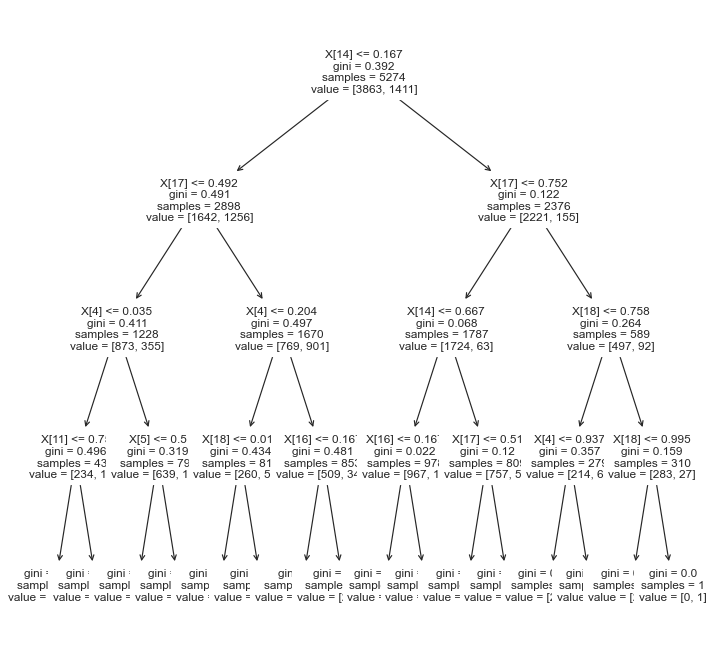

In [30]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
y_pred_train_dt = clf.predict(X_train)

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10,10))
tree.plot_tree(clf, fontsize=10)
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
conf=confusion_matrix(y_pred, y_test)
conf

array([[1038,  232],
       [ 262,  226]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1300
           1       0.46      0.49      0.48       458

    accuracy                           0.72      1758
   macro avg       0.64      0.65      0.64      1758
weighted avg       0.73      0.72      0.72      1758



In [33]:
recall_score(y_test, y_pred, average='weighted')

0.7189988623435722

**Random Forest**

In [34]:
rf = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=42)
rf.fit(X_train, y_train)
y_pred1=rf.predict(X_test)
print('Accuracy of Random Forest on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

C:\Users\aarsy\AppData\Local\Temp/ipykernel_18004/971331246.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy of Random Forest on training set: 1.00
Accuracy of Random Forest on test set: 0.78


In [35]:
conf1=confusion_matrix(y_pred1, y_test)
conf1

array([[1161,  239],
       [ 139,  219]], dtype=int64)

In [36]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1300
           1       0.61      0.48      0.54       458

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.78      1758



In [37]:
recall_score(y_test, y_pred1, average='weighted')

0.7849829351535836

**Support Vector Machine (SVM)**

In [38]:
classifier = SVC()
#training model
classifier.fit(X_train, y_train)
#Make the prediction
y_pred2 = classifier.predict(X_test)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

c:\Users\aarsy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of SVM classifier on training set: 0.82
Accuracy of SVM classifier on test set: 0.79


In [39]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1300
           1       0.62      0.47      0.53       458

    accuracy                           0.79      1758
   macro avg       0.72      0.68      0.70      1758
weighted avg       0.77      0.79      0.78      1758



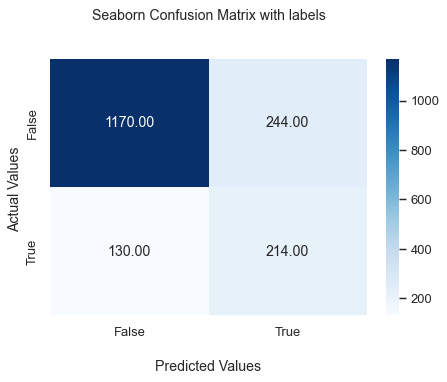

In [40]:
conf2=confusion_matrix(y_pred2, y_test)
conf2

ax = sns.heatmap(conf2, annot=True, cmap='Blues', fmt='.2f')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
recall_score(y_test, y_pred2, average='weighted')

0.7872582480091013

**Logistic Regression**

In [42]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred3 = logreg.predict(X_test)
print('Accuracy of Logistic regression on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of Logistic regression on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

c:\Users\aarsy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Logistic regression on training set: 0.82
Accuracy of Logistic regression on test set: 0.79


In [43]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.51      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



In [44]:
conf3=confusion_matrix(y_pred3, y_test)
conf3

array([[1157,  223],
       [ 143,  235]], dtype=int64)

In [45]:
recall_score(y_test, y_pred3, average='weighted')

0.7918088737201365

**AdaBoost**

In [46]:
# Fit model
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

# Predict on test set
y_pred4 = ab.predict(X_test)
print('Accuracy of Logistic regression on training set: {:.2f}'
     .format(classifier.score(X_train, y_train)))
print('Accuracy of Logistic regression on test set: {:.2f}'
     .format(classifier.score(X_test, y_test)))

c:\Users\aarsy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy of Logistic regression on training set: 0.82
Accuracy of Logistic regression on test set: 0.79


* Alasan memilih Recall karena: kita lebih memilih False Positif lebih baik terjadi daripada False Negatif.

**XGBoost**